In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import matplotlib.font_manager as font_manager

del font_manager.weight_dict['roman']
font_manager._rebuild()

font = font_manager.FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_weight('light')

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

# Avoid Type-3 fonts
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

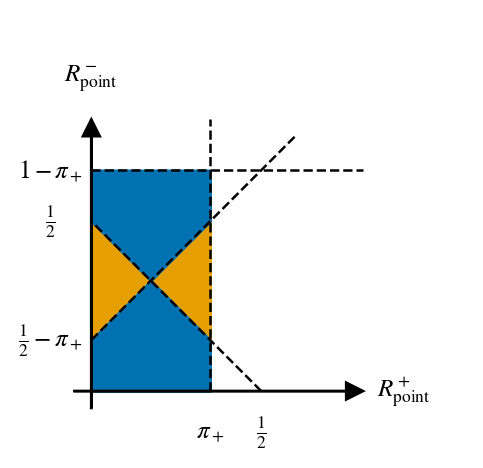

In [3]:
PI = 0.35

def f1(input: float):
    return input + 1/2 - PI

def f2(input: float):
    return - input + 1/2

fig, ax = plt.subplots(dpi=180, figsize=(3, 3))

margin = 12e-2

vmax = 0.8

ax.arrow(x=-0.05, y=0, dx=vmax, dy=0, head_length=0.05, head_width=0.05, fc='k', ec='k')
ax.arrow(x=0, y=-0.05, dx=0, dy=vmax, head_length=0.05, head_width=0.05, fc='k', ec='k')

# x-labels
ax.text(PI, 0-margin, "$\pi_+$", horizontalalignment='center', verticalalignment='center')
ax.text(1/2, 0-margin, r"$\frac{1}{2}$", horizontalalignment='center', verticalalignment='center')

# y-labels
ax.text(0-margin, 1-PI, "$1-\pi_+$", horizontalalignment='center', verticalalignment='center')
ax.text(0-margin, 1/2, r"$\frac{1}{2}$", horizontalalignment='center', verticalalignment='center')

if PI >= 1/2:
    ax.text(PI-1/2, 0-margin, r"$\pi_+ - \frac{1}{2}$", horizontalalignment='center', verticalalignment='center')
else:
    ax.text(0-margin, 1/2-PI, r"$\frac{1}{2}-\pi_+$", horizontalalignment='center', verticalalignment='center')

ax.text(vmax+margin, 0, "$R^+_\mathrm{point}$", horizontalalignment='center', verticalalignment='center')
ax.text(0, vmax+margin, "$R^-_\mathrm{point}$", horizontalalignment='center', verticalalignment='center')

ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-0.1, 1.1])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

ax.set_aspect('equal', 'box')

color = "k"
ax.plot([PI, PI], [0, vmax], c=color, linestyle='dashed', linewidth=1)
ax.plot([0, vmax], [1-PI, 1-PI], c=color, linestyle='dashed', linewidth=1)
ax.plot([1/2, 0], [0, 1/2], c=color, linestyle='dashed', linewidth=1)

if PI >= 0.5:
    ax.plot([max(0, PI-1/2), vmax], [max(1/2 - PI, 0), f1(vmax)], c=color, linestyle='dashed', linewidth=1)
else:
    ax.plot([max(0, PI-1/2), 0.6], [max(1/2 - PI, 0), f1(0.6)], c=color, linestyle='dashed', linewidth=1)

color_success = "C0"
color_fail = "C1"

x = np.array([0, PI/2, PI])
x = np.linspace(0, PI, 100)

C1 = "#e69f00"
C2 = "#0072b2"
label1 = "unsatisfied area"
label2 = "satisfied area"

if PI < 1/2:
    C1, C2 = C2, C1
    label1, label2 = label2, label1

alpha = 1

# region3 (right)
upper = np.minimum(1-PI, f1(x))
lower = np.maximum(0, f2(x))
ax.fill_between(x, upper, lower, where=(upper>=lower), color=C2, alpha=alpha, label=label2, edgecolor='face')

# region4 (left)
upper = np.minimum(1-PI, f2(x))
lower = np.maximum(0, f1(x))
ax.fill_between(x, upper, lower, where=(upper>=lower), color=C2, alpha=alpha, edgecolor='face')

# region1 (top)
upper = 1-PI
lower =  np.maximum(f1(x), f2(x))
ax.fill_between(x, upper, lower, where=(upper>=lower), color=C1, alpha=alpha, label=label1, edgecolor='face')

# region2 (bottom)
upper = np.minimum(f1(x), f2(x))
lower = 0
ax.fill_between(x, upper, lower, where=(upper>=lower), color=C1, alpha=alpha, edgecolor='face')

if PI > 1 /2:
    ax.legend(loc=(0.2, 0.6), framealpha=0.95)

plt.savefig('img/unlabel_assingment_{}.pdf'.format(str(PI).replace(".", "")), bbox_inches='tight', format='pdf')